# Практическая работа №3. Проверка статистических гипотез

## Цели:
- знакомство с основными задачами проверки статистических гипотез; 
- изучение критериев проверки гипотез о виде неизвестного закона распределения генеральной совокупности и неизвестных параметрах известного закона распределения;
- формирование навыков проверки статистических гипотез с помощью языка программирования Python.

## Задачи:
1. Проверка гипотез о средних и дисперсиях выборочных данных.
2. Анализ устойчивости критериев к нарушению предположений о нормальности исходных данных.

## Вариант 5

In [1]:
# Импорты
# a b c d e f g h i j k l m n o p q r s t u v w x y z
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats import weightstats

In [2]:
dataframe = pd.read_csv("variant_5.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   couple_1_1  50 non-null     float64
 1   couple_1_2  50 non-null     float64
 2   couple_2_1  50 non-null     float64
 3   couple_2_2  50 non-null     float64
 4   couple_3_1  50 non-null     float64
 5   couple_3_2  50 non-null     float64
 6   couple_4_1  50 non-null     float64
 7   couple_4_2  50 non-null     float64
 8   couple_5_1  50 non-null     float64
 9   couple_5_2  50 non-null     float64
 10  couple_6_1  50 non-null     float64
 11  couple_6_2  50 non-null     float64
dtypes: float64(12)
memory usage: 4.8 KB


## Задание 1. Даны 6 пар выборок заданного объема 𝑛 из генеральной совокупности неизвестных законов распределения.

In [3]:
dataframe.describe()

,couple_1_1,couple_1_2,couple_2_1,couple_2_2,couple_3_1,couple_3_2,couple_4_1,couple_4_2,couple_5_1,couple_5_2,couple_6_1,couple_6_2
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,612.497420,471.734950,-511.743192,1050.612093,-502.213893,-993.526503,-422.792914,-378.603057,600.671009,810.569509,676.389386,482.801820
std,655.304147,100.627018,937.189055,989.316659,926.452169,912.716282,727.500766,662.550678,186.447990,106.168747,460.148492,577.484013
min,-763.905301,174.759138,-3044.762170,-543.066721,-3217.188001,-2764.297545,-2123.929175,-1579.273417,218.318488,513.982003,-274.032895,-535.602324
25%,66.144098,422.214758,-1083.113294,136.521664,-982.721733,-1634.881128,-865.665231,-930.662960,463.158459,725.092958,311.190781,-62.089037
50%,585.853298,471.324573,-553.522071,1071.738209,-391.706238,-1079.145721,-307.978730,-391.744673,583.083363,830.808089,675.731906,692.823288
75%,923.617527,516.505284,76.831344,1862.597833,46.979862,-375.833781,-38.197735,61.288172,753.792577,907.971894,949.469500,963.939739
max,2281.652768,749.680915,1240.267025,2622.471548,1119.924844,1629.281525,1648.699773,1148.436928,1147.263124,1022.691491,1658.889871,1227.682550


In [9]:
def make_batches(container, batch_size=2):
    return [container[i: i + batch_size] for i in range(0, len(container), batch_size)]


columns = tuple(dataframe.columns)  # Названия столбцов
pairs = make_batches(columns)  # Делаем пары из столбцов
pairs_dict = {index: pair for index, pair in enumerate(pairs)}


alpha = 0.05 # Уровень значимости

normality = {}

# Устанавливаем факт нормальности распределений
for num, pair in enumerate(pairs, start=1):
    print(f"\n{num}-ая Пара", "=" * 55)
    for column in pair:
        test_result = scipy.stats.shapiro(dataframe[column])
        is_normal = test_result.pvalue > alpha
        normality[column] = is_normal

        distribution = "нормально" if is_normal else "не нормально"
        sign = ">" if is_normal else "<"
        print(f"Столбец {column} распределен {distribution} (p-value={test_result.pvalue:.3f} {sign} {alpha})")


1-ая Пара =======================================================
Столбец couple_1_1 распределен нормально (p-value=0.719 > 0.05)
Столбец couple_1_2 распределен нормально (p-value=0.080 > 0.05)

2-ая Пара =======================================================
Столбец couple_2_1 распределен нормально (p-value=0.168 > 0.05)
Столбец couple_2_2 распределен не нормально (p-value=0.013 < 0.05)

3-ая Пара =======================================================
Столбец couple_3_1 распределен нормально (p-value=0.314 > 0.05)
Столбец couple_3_2 распределен нормально (p-value=0.841 > 0.05)

4-ая Пара =======================================================
Столбец couple_4_1 распределен нормально (p-value=0.513 > 0.05)
Столбец couple_4_2 распределен нормально (p-value=0.599 > 0.05)

5-ая Пара =======================================================
Столбец couple_5_1 распределен нормально (p-value=0.712 > 0.05)
Столбец couple_5_2 распределен нормально (p-value=0.243 > 0.05)

6-ая Пара ===========

## Часть Б. Проверяем равенство дисперсий для каждой пары
Для этого необходимо выдвинуть и проверить на заданном уровне значимости 𝛼 для каждой пары выборок гипотезу о равенстве двух дисперсий H<sub>0</sub> : 𝜎<sub>1</sub><sup>2</sup> = 𝜎<sub>2</sub><sup>2</sup>, при альтернативной H<sub>1</sub> : 𝜎<sub>1</sub><sup>2</sup> != 𝜎<sub>2</sub><sup>2</sup>

Для проверки гипотез воспользуемся следующими критериями: критерий Фишера, критерий Барлетта, критерий Левене

Так как критерий Фишера чувствителен к нормальности распределения, выберем для него те пары столбцов, в которы данные распределены по нормальному закону

In [5]:
variance_equality = {}

criterias_for_pairs = {
    "fisher": [0, 2],
    "bartlett": [3, 4],
    "levene": [1, 5],
}

for criteria, indexes in criterias_for_pairs.items():
    for index in indexes:
        pair = pairs_dict[index]
        col1, col2 = pair

        if criteria == "fisher":
            variance1, variance2 = np.var(dataframe[col1]), np.var(dataframe[col2])
            F = max([variance1 / variance2, variance2 / variance1])
            dfd, dfn = sorted([len(dataframe[col1]) - 1, len(dataframe[col2]) - 1])
            p_value = scipy.stats.f.sf(F, dfn, dfd)

        elif criteria == "bartlett":
            _, p_value = scipy.stats.bartlett(dataframe[col1], dataframe[col2])

        elif criteria == "levene": 
            _, p_value = scipy.stats.levene(dataframe[col1], dataframe[col2])

        is_equal = p_value > alpha
        variance_equality[pair] = is_equal

        sign = ">" if is_equal else "<"
        print(f"Дисперсии в паре столбцов {pair} равны? {is_equal} (p-value={p_value:.3f} {sign} {alpha}) [{criteria}]")

Дисперсии в паре столбцов ('couple_1_1', 'couple_1_2') равны? False (p-value=0.000 < 0.05) [fisher]
Дисперсии в паре столбцов ('couple_3_1', 'couple_3_2') равны? True (p-value=0.459 > 0.05) [fisher]
Дисперсии в паре столбцов ('couple_4_1', 'couple_4_2') равны? True (p-value=0.515 > 0.05) [bartlett]
Дисперсии в паре столбцов ('couple_5_1', 'couple_5_2') равны? False (p-value=0.000 < 0.05) [bartlett]
Дисперсии в паре столбцов ('couple_2_1', 'couple_2_2') равны? True (p-value=0.291 > 0.05) [levene]
Дисперсии в паре столбцов ('couple_6_1', 'couple_6_2') равны? False (p-value=0.036 < 0.05) [levene]


## Часть А. Проверить равенство выборочных средних для каждой пары.
Для этого необходимо выдвинуть гипотезу о равенстве двух выборочных средних 𝐻: 𝑚1 = 𝑚2 при альтернативной 𝐻̅: 𝑚1 ≠ 𝑚2.

Для проверки гипотез воспользуемся следующими критериями: 𝑧-критерий, 𝑡-критерий (критерий Стьюдента), 𝑈-критерий Манна – Уитни.

In [6]:
expected_value_equality = {}

for pair in pairs:
    col1, col2 = pair

    if variance_equality[pair]:
        if normality[col1] and normality[col2]:
            criteria = "t-критерий"
            f = scipy.stats.ttest_ind
        else:
            criteria = "z-критерий"
            f = weightstats.ztest
    else:
        criteria = "U-критерий Манна-Уитни"
        f = scipy.stats.mannwhitneyu

    _, p_value = f(dataframe[col1], dataframe[col2])
    is_equal = p_value > alpha
    expected_value_equality[pair] = is_equal

    sign = ">" if is_equal else "<"
    print(f"Мат. ожидания в паре столбцов {pair} равны? {is_equal} (p-value={p_value:.3f} {sign} {alpha}) [{criteria}]")

Мат. ожидания в паре столбцов ('couple_1_1', 'couple_1_2') равны? True (p-value=0.063 > 0.05) [U-критерий Манна-Уитни]
Мат. ожидания в паре столбцов ('couple_2_1', 'couple_2_2') равны? False (p-value=0.000 < 0.05) [z-критерий]
Мат. ожидания в паре столбцов ('couple_3_1', 'couple_3_2') равны? False (p-value=0.009 < 0.05) [t-критерий]
Мат. ожидания в паре столбцов ('couple_4_1', 'couple_4_2') равны? True (p-value=0.751 > 0.05) [t-критерий]
Мат. ожидания в паре столбцов ('couple_5_1', 'couple_5_2') равны? False (p-value=0.000 < 0.05) [U-критерий Манна-Уитни]
Мат. ожидания в паре столбцов ('couple_6_1', 'couple_6_2') равны? True (p-value=0.145 > 0.05) [U-критерий Манна-Уитни]


## Задание 2. Дано 12 выборок заданного объема 𝑛 из генеральной совокупности неизвестных законов распределения. 
### Необходимо проверить равенство выборочных дисперсий.
Для этого нужно выдвинуть и проверить на заданном уровне значимости 𝛼 гипотезу о равенстве выборочных дисперсий 𝐻: 𝜎̂1<sup>2</sup> = 𝜎̂2<sup>2</sup> = ⋯ = 𝜎̂𝑙<sup>2</sup> при альтернативной !𝐻: 𝜎̂𝑖<sup>2</sup> ≠ 𝜎̂𝑗<sup>2</sup>, 𝑖 ≠ 𝑗. 

Для проверки гипотез воспользуемся следующими критериями: критерий Кочрена, критерий Бартлетта, критерий Левене.

In [7]:
criteria_functions = [scipy.stats.bartlett, scipy.stats.levene]

for criteria_function in criteria_functions:
    _, p_value = criteria_function(*[dataframe[col] for col in columns if normality[col]]) 
    is_equal = p_value > alpha

    sign = ">" if is_equal else "<"
    print(f"Выборочные дисперсии равны? {is_equal} (p-value={p_value:.3f} {sign} {alpha}) [{criteria_function.__name__}]")

Выборочные дисперсии равны? False (p-value=0.000 < 0.05) [bartlett]
Выборочные дисперсии равны? False (p-value=0.000 < 0.05) [levene]


## Задание 3. 
- Генерируется выборка заданного объема 𝑛 (50) по нормальному закону распределения 𝑁(𝑚, 𝜎). 
- Исследуется и сравнивается поведение двух критериев согласия при нарушении предположения о нормальности 𝑋 = 𝑝𝑁(𝑚, 𝜎2) + (1 − 𝑝)𝐹, где F - распределение Стьюдента.  
- Параметры распределений задаются самостоятельно. Величина 𝑝 изменяется от 0 до 1 с шагом 0.01. 
- Получаемые зависимости между выходными характеристиками и выбранными параметрами представляются в графической форме. 
- Исследуется поведение указанного критерия при варьировании параметров закона 𝐹.


Sample #6 0.000 < 0.05 [Критерий Шапиро]
Распределена ли выборка по нормальному закону?: True [Критерий Колмогорова-Смирнова]
Распределена ли выборка по нормальному закону?: True [Критерий Хи-квадрат]

Sample #8 1.000 < 0.05 [Критерий Шапиро]
Распределена ли выборка по нормальному закону?: True [Критерий Колмогорова-Смирнова]
Распределена ли выборка по нормальному закону?: False [Критерий Хи-квадрат]

Sample #30 0.000 < 0.05 [Критерий Шапиро]
Распределена ли выборка по нормальному закону?: True [Критерий Колмогорова-Смирнова]
Распределена ли выборка по нормальному закону?: False [Критерий Хи-квадрат]

Sample #44 0.000 < 0.05 [Критерий Шапиро]
Распределена ли выборка по нормальному закону?: True [Критерий Колмогорова-Смирнова]
Распределена ли выборка по нормальному закону?: False [Критерий Хи-квадрат]


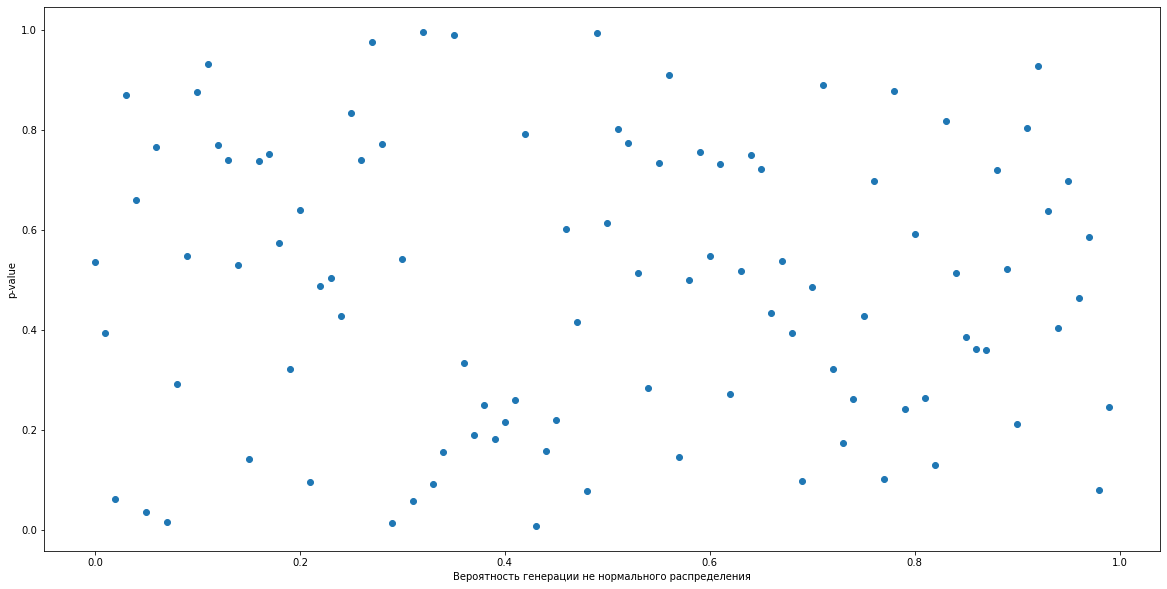

In [8]:
n = 50
p_values = []

for num, p in enumerate(np.arange(0, 1, 0.01), start=1):
    use_normal_distribution = np.random.choice([True, False], size=n, p=[p, 1 - p])
    sample = np.where(use_normal_distribution, np.random.normal(size=n), np.random.standard_t(df=n - 1, size=n))

    shapiro_test = scipy.stats.shapiro(sample)
    is_normal = shapiro_test.pvalue > alpha
    p_values.append(shapiro_test.pvalue)

    if is_normal:
        continue
    print(f"\nSample #{num} {p_value:.3f} < {alpha} [Критерий Шапиро]")

    _, p_value = scipy.stats.kstest(sample, "norm")
    print(f"Распределена ли выборка по нормальному закону?: {p_value > alpha} [Критерий Колмогорова-Смирнова]")
    _, p_value = scipy.stats.chisquare(sample)
    print(f"Распределена ли выборка по нормальному закону?: {p_value > alpha} [Критерий Хи-квадрат]")


x = np.arange(0, 1, 0.01)
y = p_values

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.xlabel("Вероятность генерации не нормального распределения")
plt.ylabel("p-value")
plt.show()
